In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

In [3]:
NUM_CLASSES = 9

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 9)                 99        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [9]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/3 [=========>....................] - ETA: 2s - loss: 2.2974 - accuracy: 0.1172
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 1s 176ms/step - loss: 2.2673 - accuracy: 0.1448 - val_loss: 2.1882 - val_accuracy: 0.0560
Epoch 2/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2167 - accuracy: 0.1328
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 42ms/step - loss: 2.2393 - accuracy: 0.1233 - val_loss: 2.1720 - val_accuracy: 0.1520
Epoch 3/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2899 - accuracy: 0.1562
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 46ms/step - loss: 2.2627 - accuracy: 0.1582 - val_loss: 2.1576 - val_accuracy: 0.1040
Epoch 4/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1820 - accuracy: 0.1719
Epoch 4: sa

3/3 [==============================] - 0s 41ms/step - loss: 1.9209 - accuracy: 0.2654 - val_loss: 1.8955 - val_accuracy: 0.2880
Epoch 29/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9375 - accuracy: 0.2500
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 42ms/step - loss: 1.8947 - accuracy: 0.2708 - val_loss: 1.8825 - val_accuracy: 0.2880
Epoch 30/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9490 - accuracy: 0.2188
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 40ms/step - loss: 1.8898 - accuracy: 0.2976 - val_loss: 1.8694 - val_accuracy: 0.2880
Epoch 31/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8562 - accuracy: 0.2891
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 42ms/step - loss: 1.8734 - accuracy: 0.2815 - val_loss: 1.

Epoch 56/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5189 - accuracy: 0.4297
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 40ms/step - loss: 1.5668 - accuracy: 0.3914 - val_loss: 1.5316 - val_accuracy: 0.4800
Epoch 57/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5582 - accuracy: 0.3984
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 40ms/step - loss: 1.5761 - accuracy: 0.3807 - val_loss: 1.5191 - val_accuracy: 0.4800
Epoch 58/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5330 - accuracy: 0.3984
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 42ms/step - loss: 1.5769 - accuracy: 0.3673 - val_loss: 1.5074 - val_accuracy: 0.4800
Epoch 59/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6234 - accuracy: 0.3047
Epoch

1/3 [=========>....................] - ETA: 0s - loss: 1.3357 - accuracy: 0.4297
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 42ms/step - loss: 1.3517 - accuracy: 0.4424 - val_loss: 1.2419 - val_accuracy: 0.5280
Epoch 84/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4181 - accuracy: 0.4141
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 38ms/step - loss: 1.3475 - accuracy: 0.4638 - val_loss: 1.2334 - val_accuracy: 0.5280
Epoch 85/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3788 - accuracy: 0.4609
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 38ms/step - loss: 1.3645 - accuracy: 0.4745 - val_loss: 1.2241 - val_accuracy: 0.5360
Epoch 86/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3371 - accuracy: 0.5000
Epoch 86: saving mo

1/3 [=========>....................] - ETA: 0s - loss: 1.1088 - accuracy: 0.5859
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 30ms/step - loss: 1.1604 - accuracy: 0.5442 - val_loss: 1.0214 - val_accuracy: 0.6400
Epoch 111/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1969 - accuracy: 0.5391
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 1.1968 - accuracy: 0.5147 - val_loss: 1.0168 - val_accuracy: 0.6400
Epoch 112/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2302 - accuracy: 0.5391
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 30ms/step - loss: 1.1644 - accuracy: 0.5282 - val_loss: 1.0118 - val_accuracy: 0.6400
Epoch 113/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1643 - accuracy: 0.5312
Epoch 113: sa

1/3 [=========>....................] - ETA: 0s - loss: 1.0520 - accuracy: 0.6094
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 1.0392 - accuracy: 0.5898 - val_loss: 0.8586 - val_accuracy: 0.6800
Epoch 138/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1108 - accuracy: 0.5625
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 30ms/step - loss: 1.0791 - accuracy: 0.5576 - val_loss: 0.8533 - val_accuracy: 0.6640
Epoch 139/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1190 - accuracy: 0.5469
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 30ms/step - loss: 1.0699 - accuracy: 0.5657 - val_loss: 0.8499 - val_accuracy: 0.6640
Epoch 140/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0463 - accuracy: 0.5938
Epoch 140: sa

1/3 [=========>....................] - ETA: 0s - loss: 1.0491 - accuracy: 0.5703
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.9694 - accuracy: 0.6005 - val_loss: 0.7425 - val_accuracy: 0.6640
Epoch 165/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9819 - accuracy: 0.6562
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.9907 - accuracy: 0.6193 - val_loss: 0.7408 - val_accuracy: 0.6640
Epoch 166/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0297 - accuracy: 0.6094
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 32ms/step - loss: 0.9985 - accuracy: 0.6032 - val_loss: 0.7404 - val_accuracy: 0.6720
Epoch 167/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0065 - accuracy: 0.6250
Epoch 167: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.8779 - accuracy: 0.5781
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 30ms/step - loss: 0.8798 - accuracy: 0.6354 - val_loss: 0.6557 - val_accuracy: 0.7120
Epoch 192/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8442 - accuracy: 0.6250
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 30ms/step - loss: 0.8620 - accuracy: 0.6354 - val_loss: 0.6531 - val_accuracy: 0.6960
Epoch 193/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9710 - accuracy: 0.5703
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 35ms/step - loss: 0.9194 - accuracy: 0.6166 - val_loss: 0.6520 - val_accuracy: 0.6960
Epoch 194/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9347 - accuracy: 0.5547
Epoch 194: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.8189 - accuracy: 0.6094
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 35ms/step - loss: 0.8619 - accuracy: 0.6139 - val_loss: 0.6057 - val_accuracy: 0.7120
Epoch 219/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8784 - accuracy: 0.6562
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 41ms/step - loss: 0.8733 - accuracy: 0.6515 - val_loss: 0.6054 - val_accuracy: 0.7120
Epoch 220/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9266 - accuracy: 0.5781
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 36ms/step - loss: 0.8629 - accuracy: 0.6139 - val_loss: 0.6055 - val_accuracy: 0.6960
Epoch 221/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8939 - accuracy: 0.6641
Epoch 221: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.8078 - accuracy: 0.6719
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.7964 - accuracy: 0.6676 - val_loss: 0.5727 - val_accuracy: 0.6960
Epoch 246/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8264 - accuracy: 0.5859
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.7464 - accuracy: 0.6756 - val_loss: 0.5724 - val_accuracy: 0.7120
Epoch 247/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8586 - accuracy: 0.6016
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 32ms/step - loss: 0.8159 - accuracy: 0.6568 - val_loss: 0.5720 - val_accuracy: 0.7360
Epoch 248/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7670 - accuracy: 0.6641
Epoch 248: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7742 - accuracy: 0.6875
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.7615 - accuracy: 0.7051 - val_loss: 0.5321 - val_accuracy: 0.8240
Epoch 273/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7543 - accuracy: 0.7188
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.7778 - accuracy: 0.6863 - val_loss: 0.5305 - val_accuracy: 0.8240
Epoch 274/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8201 - accuracy: 0.6641
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 30ms/step - loss: 0.8651 - accuracy: 0.6488 - val_loss: 0.5310 - val_accuracy: 0.8240
Epoch 275/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7571 - accuracy: 0.6875
Epoch 275: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7568 - accuracy: 0.7266
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 32ms/step - loss: 0.7852 - accuracy: 0.6944 - val_loss: 0.5101 - val_accuracy: 0.8240
Epoch 300/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7565 - accuracy: 0.7031
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 32ms/step - loss: 0.7573 - accuracy: 0.6863 - val_loss: 0.5060 - val_accuracy: 0.8240
Epoch 301/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7110 - accuracy: 0.7188
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 30ms/step - loss: 0.6981 - accuracy: 0.7239 - val_loss: 0.5014 - val_accuracy: 0.8240
Epoch 302/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7107 - accuracy: 0.6875
Epoch 302: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7720 - accuracy: 0.7031
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.7588 - accuracy: 0.6863 - val_loss: 0.4896 - val_accuracy: 0.9040
Epoch 327/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7269 - accuracy: 0.6953
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 33ms/step - loss: 0.7601 - accuracy: 0.6729 - val_loss: 0.4883 - val_accuracy: 0.9040
Epoch 328/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7496 - accuracy: 0.7188
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.7790 - accuracy: 0.6863 - val_loss: 0.4860 - val_accuracy: 0.9040
Epoch 329/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8104 - accuracy: 0.6719
Epoch 329: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7949 - accuracy: 0.6562
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 38ms/step - loss: 0.7497 - accuracy: 0.6702 - val_loss: 0.4798 - val_accuracy: 0.9120
Epoch 354/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7726 - accuracy: 0.6797
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 30ms/step - loss: 0.7161 - accuracy: 0.7212 - val_loss: 0.4761 - val_accuracy: 0.9200
Epoch 355/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7715 - accuracy: 0.6484
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 29ms/step - loss: 0.7874 - accuracy: 0.6836 - val_loss: 0.4742 - val_accuracy: 0.9200
Epoch 356/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7978 - accuracy: 0.6016
Epoch 356: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7670 - accuracy: 0.7109
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 32ms/step - loss: 0.7416 - accuracy: 0.6836 - val_loss: 0.4486 - val_accuracy: 0.9200
Epoch 381/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7846 - accuracy: 0.6797
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 30ms/step - loss: 0.7226 - accuracy: 0.6971 - val_loss: 0.4483 - val_accuracy: 0.9200
Epoch 382/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7441 - accuracy: 0.6797
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 30ms/step - loss: 0.7421 - accuracy: 0.6836 - val_loss: 0.4477 - val_accuracy: 0.9200
Epoch 383/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7227 - accuracy: 0.7188
Epoch 383: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.6888 - accuracy: 0.6562
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.7218 - accuracy: 0.6863 - val_loss: 0.4358 - val_accuracy: 0.9200
Epoch 408/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6967 - accuracy: 0.6797
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 32ms/step - loss: 0.6682 - accuracy: 0.7024 - val_loss: 0.4333 - val_accuracy: 0.9200
Epoch 409/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8326 - accuracy: 0.6484
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.7513 - accuracy: 0.6836 - val_loss: 0.4331 - val_accuracy: 0.9200
Epoch 410/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7353 - accuracy: 0.6875
Epoch 410: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.6724 - accuracy: 0.6953
Epoch 434: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.6826 - accuracy: 0.7078 - val_loss: 0.4182 - val_accuracy: 0.9040
Epoch 435/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7104 - accuracy: 0.6797
Epoch 435: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 32ms/step - loss: 0.7032 - accuracy: 0.7024 - val_loss: 0.4179 - val_accuracy: 0.9120
Epoch 436/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7744 - accuracy: 0.6641
Epoch 436: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 30ms/step - loss: 0.7215 - accuracy: 0.7158 - val_loss: 0.4167 - val_accuracy: 0.9200
Epoch 437/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7010 - accuracy: 0.6797
Epoch 437: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7418 - accuracy: 0.6875
Epoch 461: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 30ms/step - loss: 0.6922 - accuracy: 0.7346 - val_loss: 0.4139 - val_accuracy: 0.9200
Epoch 462/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7651 - accuracy: 0.7031
Epoch 462: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 29ms/step - loss: 0.7265 - accuracy: 0.6997 - val_loss: 0.4139 - val_accuracy: 0.9200
Epoch 463/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6102 - accuracy: 0.7578
Epoch 463: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 29ms/step - loss: 0.6923 - accuracy: 0.6997 - val_loss: 0.4130 - val_accuracy: 0.9200
Epoch 464/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6746 - accuracy: 0.6875
Epoch 464: sa

In [12]:

val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 26ms/step - loss: 0.4104 - accuracy: 0.9280


In [13]:

model = tf.keras.models.load_model(model_save_path)

In [14]:

predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 70ms/step
[3.5666025e-01 1.1518712e-03 6.5680608e-02 2.0482854e-03 4.5077477e-06
 1.9178127e-03 5.6376542e-05 5.2998552e-05 5.7242727e-01]
8


4/4 [==============================] - 0s 5ms/step


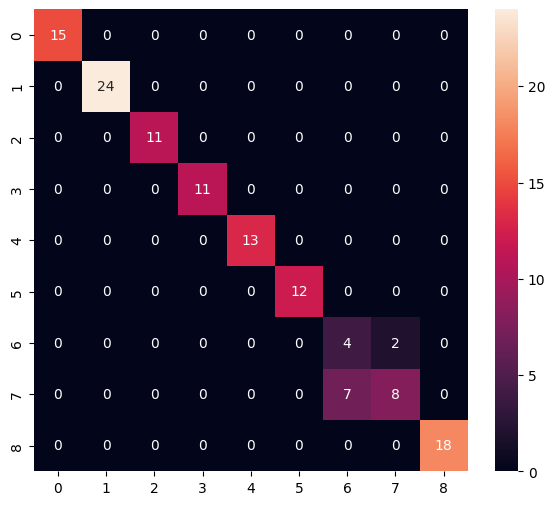

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        12
           6       0.36      0.67      0.47         6
           7       0.80      0.53      0.64        15
           8       1.00      1.00      1.00        18

    accuracy                           0.93       125
   macro avg       0.91      0.91      0.90       125
weighted avg       0.95      0.93      0.93       125



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [16]:

model.save(model_save_path, include_optimizer=False)

In [17]:

tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Priyanka\AppData\Local\Temp\tmpcxepxydl\assets


INFO:tensorflow:Assets written to: C:\Users\Priyanka\AppData\Local\Temp\tmpcxepxydl\assets


6764

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.5666013e-01 1.1518707e-03 6.5680586e-02 2.0482850e-03 4.5077441e-06
 1.9178110e-03 5.6376546e-05 5.2998465e-05 5.7242739e-01]
8
